# Setting

A polling institute wants to be able to estimate an individual’s income from his/her personal data (see einkommen.train). To this aim, 30.000 individuals were interviewed concerning the features summarized below. For some of the individuals, not all features are
available. Crucially, the income of only 5.000 of the interviewee’s is known.

# Exercise Assignment Project-1 of Machine Learning


Load the data into Python and preprocess it. Choose adequate data transformations,
normalizations etc. and decide on how to deal with missing values (marked with “?”).
Consider which kinds of features the preprocessed data shall contain. Once you have
preprocessed the data, train a model to predict a person’s income group and apply it to
the 25.000 individuals whose income group is unknown. Identify a suitable learning method
and implement it in Python. Train and evaluate the model. Provide a short documentation
and motivation of each of your steps.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline
# definition of columns
columns= ['Age','Employment_type','Weighting_Factor', 'Education','School_Period',
        'Marital_Status','Employment_Area','Partnership','Ethnicity','Gender','Gain_Financial','Losses_Financial',
         'Weekly_Working_Time','Birth_Country','Income']

data_einkommen_df = pd.read_csv('einkommen.train', names =columns)


data_einkommen_df_with_income =data_einkommen_df

#data_einkommen_df = data_einkommen_df.replace(' ?',np.NaN)
#data_einkommen_df.isnull().sum().sort_values(ascending=False).head()
#print(pd.get_dummies(data_einkommen_df["Marital_Status"]))
# https://archive.ics.uci.edu/ml/datasets/adult

In [2]:
data_einkommen_df_with_income.head(20)

,Age,Employment_type,Weighting_Factor,Education,School_Period,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gain_Financial,Losses_Financial,Weekly_Working_Time,Birth_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
print(data_einkommen_df_with_income['Income'].value_counts())

 ?        25000
 <=50K     3779
 >50K      1221
Name: Income, dtype: int64


In [4]:
data_einkommen_df_with_income['Income'] = [0 if x == ' <=50K' else 1 for x in data_einkommen_df_with_income['Income'] ]
X = data_einkommen_df_with_income.drop('Income', 1)
y = data_einkommen_df_with_income.Income

EDA Pairplot

C:\Users\sefik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sefik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\sefik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


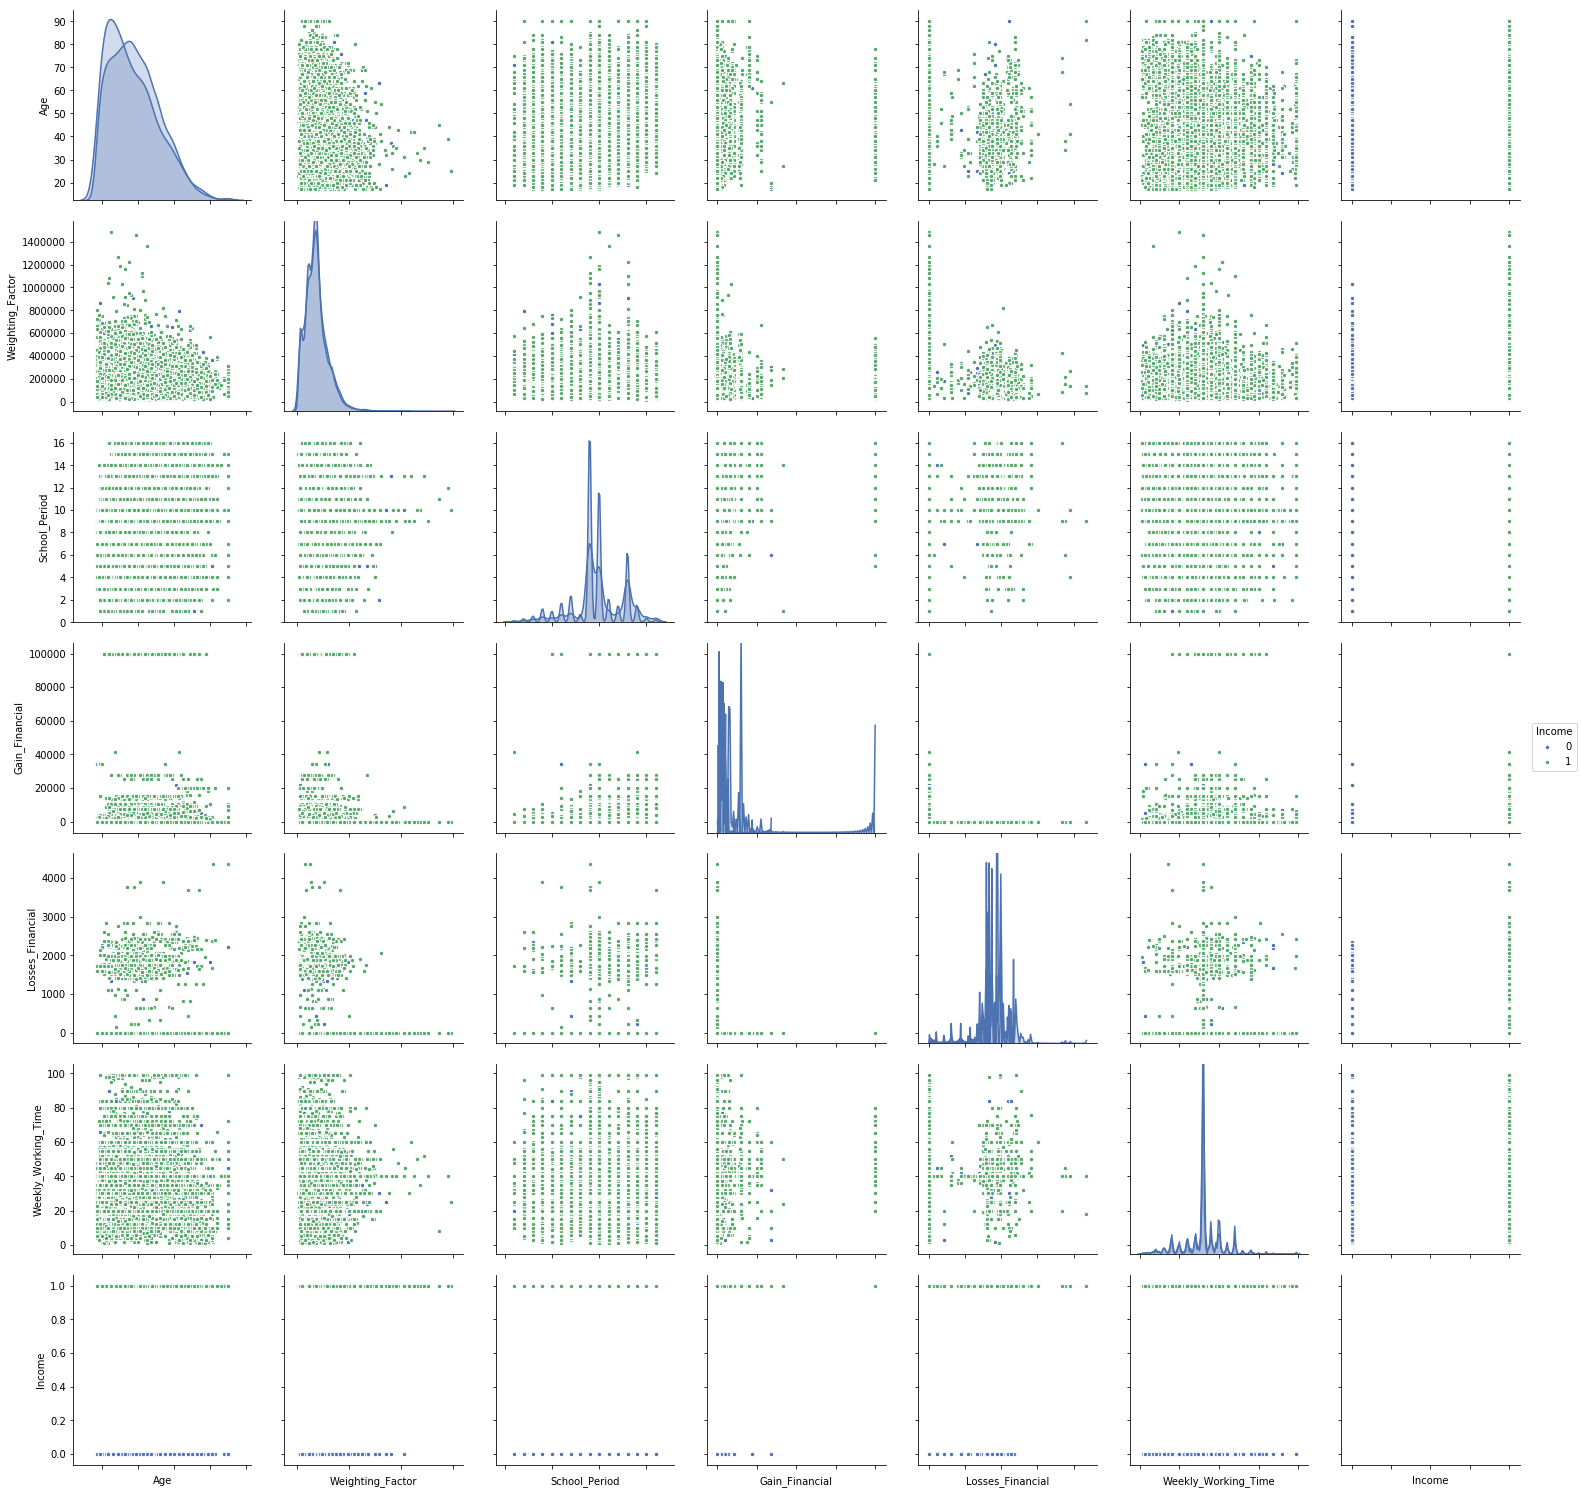

In [5]:
import seaborn as sns
#pair plots of entire dataset
pp = sns.pairplot(data_einkommen_df_with_income, hue = 'Income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

In [6]:
#correlation heatmap of dataset
import matplotlib.pyplot as plt
import seaborn as sns
def correlation_heatmap(df):
    print("deneme")
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)


deneme


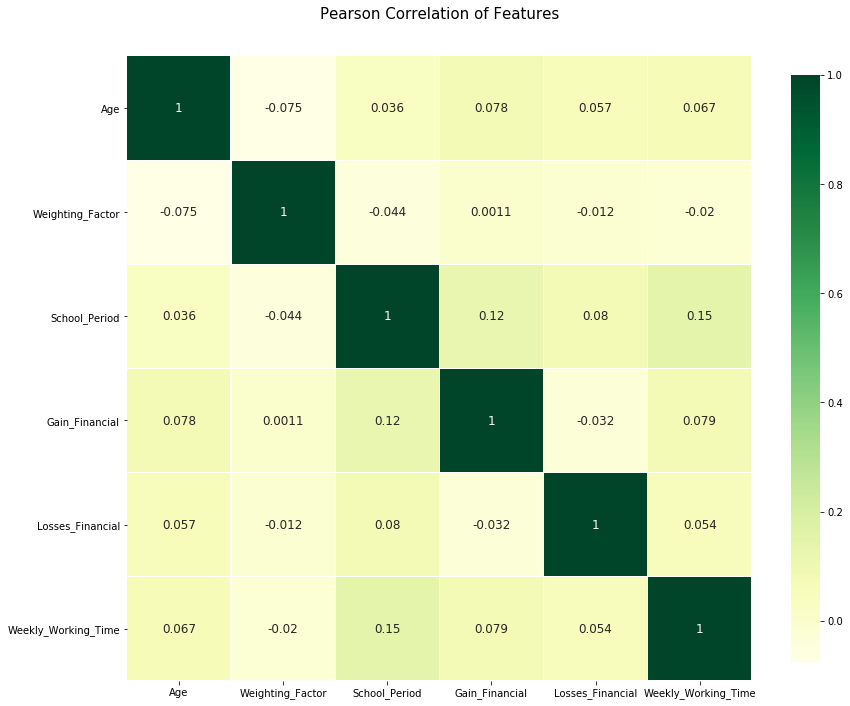

In [7]:
correlation_heatmap(X)

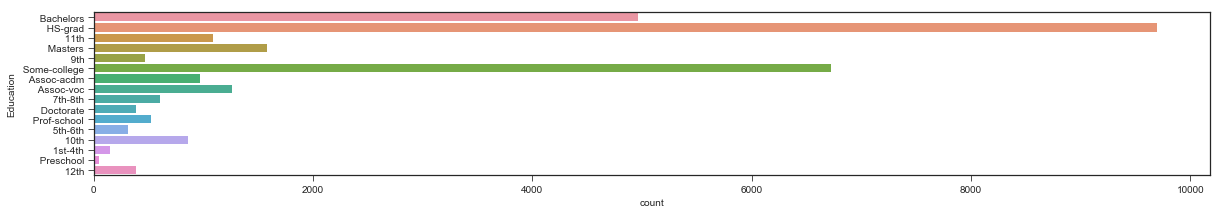

In [8]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="Education", data=X)

Data Cleaning, covert categorical variables to numerical

In [9]:
#Decide which categorical variable you want to use in your model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature 'Employment_type' has '9' unique categories
Feature 'Education' has '16' unique categories
Feature 'Marital_Status' has '7' unique categories
Feature 'Employment_Area' has '15' unique categories
Feature 'Partnership' has '6' unique categories
Feature 'Ethnicity' has '5' unique categories
Feature 'Gender' has '2' unique categories
Feature 'Birth_Country' has '42' unique categories


In [10]:
#Although 'Birth_Country' has many unique categories, most categories have a few observations
print(X['Birth_Country'].value_counts().sort_values(ascending=False).head(10))

 United-States    26871
 Mexico             602
 ?                  539
 Philippines        177
 Germany            122
 Canada             115
 Puerto-Rico        112
 El-Salvador         96
 India               94
 England             87
Name: Birth_Country, dtype: int64


In [11]:
X['Birth_Country'] =['United-States' if x == ' United-States' else 'Other' for x in X['Birth_Country']]
print(X['Birth_Country'].value_counts().sort_values(ascending=False).head(10))

United-States    26871
Other             3129
Name: Birth_Country, dtype: int64


In [12]:
# create list of features to dummy
todummy_list = ['Employment_type', 'Education','Marital_Status','Employment_Area','Partnership','Ethnicity','Gender','Birth_Country']

In [13]:
# function to dummy all the categorical variable used for dummy
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies =pd.get_dummies(df[x], prefix=x, dummy_na = False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies], axis = 1)
    return df

In [14]:
X = dummy_df(X,todummy_list)
print(X.head(5))

   Age  Weighting_Factor  School_Period  Gain_Financial  Losses_Financial  \
0   39             77516             13            2174                 0   
1   50             83311             13               0                 0   
2   38            215646              9               0                 0   
3   53            234721              7               0                 0   
4   28            338409             13               0                 0   

   Weekly_Working_Time  Employment_type_ ?  Employment_type_ Federal-gov  \
0                   40                   0                             0   
1                   13                   0                             0   
2                   40                   0                             0   
3                   40                   0                             0   
4                   40                   0                             0   

   Employment_type_ Local-gov  Employment_type_ Never-worked  \
0               

In [15]:
X = X.replace(' ?',np.NaN)
X.isnull().sum().sort_values(ascending=False).head()
# there is no missing value

Birth_Country_United-States    0
Education_ Bachelors           0
Education_ 1st-4th             0
Education_ 5th-6th             0
Education_ 7th-8th             0
dtype: int64

In [16]:
from sklearn.preprocessing import Imputer
imp =Imputer(missing_values = 'NaN',strategy = 'median', axis = 0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X), columns = X.columns)

C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


DataExploration

In [17]:
def find_outlier_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3-q1
    floor = q1-1.5*iqr
    ceiling = q3+1.5*iqr
    outlier_indices =  list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices,outlier_values


In [18]:
turkey_indices,tukey_values = find_outlier_tukey(X['Age'])
print(np.sort(tukey_values))

[79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79.
 79. 79. 79. 79. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80.
 80. 80. 80. 80. 80. 80. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81.
 81. 81. 81. 81. 81. 81. 81. 82. 82. 82. 82. 82. 82. 82. 82. 82. 82. 83.
 83. 83. 83. 83. 83. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84. 85. 85. 86.
 88. 88. 88. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90.]


In [19]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
def add_interactions(df):
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    poly = PolynomialFeatures(interaction_only = True, include_bias = False)
    df =  poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    noint_indices = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis = 1)
    
    return df


In [20]:
X = add_interactions(X)
print(X.head(5))

    Age  Weighting_Factor  School_Period  Gain_Financial  Losses_Financial  \
0  39.0           77516.0           13.0          2174.0               0.0   
1  50.0           83311.0           13.0             0.0               0.0   
2  38.0          215646.0            9.0             0.0               0.0   
3  53.0          234721.0            7.0             0.0               0.0   
4  28.0          338409.0           13.0             0.0               0.0   

   Weekly_Working_Time  Employment_type_ ?  Employment_type_ Federal-gov  \
0                 40.0                 0.0                           0.0   
1                 13.0                 0.0                           0.0   
2                 40.0                 0.0                           0.0   
3                 40.0                 0.0                           0.0   
4                 40.0                 0.0                           0.0   

   Employment_type_ Local-gov  Employment_type_ Never-worked  \
0         

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_pca = pd.DataFrame(pca.fit_transform(X))
print(X_pca.head(5))

              0             1             2             3             4  \
0 -3.952466e+07 -1.602795e+07 -6.093122e+06  1.955474e+04  5.859009e+04   
1 -2.080446e+08 -1.624016e+07 -6.698552e+06  2.223244e+06  3.100855e+05   
2 -2.080410e+08 -1.616790e+07  1.611993e+06  6.362017e+04 -1.609220e+05   
3 -2.080395e+08 -1.613782e+07  4.971790e+06  2.685707e+06 -8.982876e+05   
4 -2.080388e+08 -1.612588e+07  6.401777e+06 -2.387177e+06  1.512357e+06   

              5              6              7              8              9  
0 -41924.596773    2201.054689   29761.701982 -111502.627395   34905.167963  
1  32266.488603 -142941.623857   42549.294777  -42434.253034   20186.151248  
2  16925.491018   99150.707946 -126049.335037  -56090.406147  169677.546921  
3  13903.037638 -129091.887780  -41282.116999   22305.269550    -334.382761  
4 -48917.363514  -10529.592614  465190.734952  171231.293863   39899.996801  


PCA analysis

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)
y = ['Income']
# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');
# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [23]:
from sklearn.model_selection import train_test_split
y_unknown = y.iloc[5000:]
y_known = y.iloc[:5000]
X_unknown = X.iloc[5000:]
X_known = X.iloc[:5000]

X_train, X_test,y_train, y_test = train_test_split(X_known,y_known,train_size = 0.75,random_state = 1)

In [24]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train,y_train)
indices_selected = selected_features.get_support(indices = True)
colnames_selected = [X.columns[i] for i in indices_selected]
X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [   9   76  142  207  274  278  288  292  321  338  348  355  359  366
  374  378  390  463  466  488  491  503  505  531  540  541  547  580
  586  587  588  589  590  591  592  593  594  595  596  597  598  599
  651  652  653  654  680  682  686  690  693  715  729  742  750  751
  752  753  754  764  773  774  788  791  798  799  800  801  802  803
  805  806  808  809  810  811  812  813  815  816  817  820  821  825
  838  841  850  874  876  895  897  901  904  908  920  923  932  938
  939  943  944  945  949  950  952  953  966  971  977  978  980  988
  991 1004 1011 1012 1015 1048 1058 1068 1070 1082 1104 1118 1130 1133
 1140 1148 1155 1180 1184 1186 1187 1189 1190 1191 1194 1197 1198 1201
 1252 1256 1257 1259 1271 1281 1283 1286 1288 1289 1292 1293 1294 1297
 1299 1300 1302 1310 1314 1319 1320 1322 1328 1332 1335 1342 1405 1407
 1408 1409 1410 1411 1412 14

In [25]:
colnames_selected

['Marital_Status_ Married-civ-spouse',
 'Marital_Status_ Never-married',
 'Partnership_ Husband',
 'Age_School_Period',
 'Age_Weekly_Working_Time',
 'Age_Marital_Status_ Married-civ-spouse',
 'Age_Partnership_ Husband',
 'Weighting_Factor_Marital_Status_ Married-civ-spouse',
 'School_Period_Weekly_Working_Time',
 'School_Period_Marital_Status_ Married-civ-spouse',
 'School_Period_Partnership_ Husband',
 'Weekly_Working_Time_Marital_Status_ Married-civ-spouse',
 'Weekly_Working_Time_Partnership_ Husband',
 'Marital_Status_ Married-civ-spouse_Partnership_ Husband',
 'Marital_Status_ Married-civ-spouse_Ethnicity_ White',
 'Marital_Status_ Married-civ-spouse_Gender_ Male',
 'Marital_Status_ Married-civ-spouse_Birth_Country_United-States',
 'Partnership_ Husband_Ethnicity_ White',
 'Partnership_ Husband_Gender_ Male',
 'Partnership_ Husband_Birth_Country_United-States']

In [26]:
from sklearn.naive_bayes import GaussianNB #Naive bayes
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.812


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 0.8656


In [28]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Model is 0.8512


In [29]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [30]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [31]:

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [32]:
from sklearn.metrics import accuracy_score
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')


y_pred = clf_gini.predict(X_test)


print("Accuracy is ", accuracy_score(y_test,y_pred)*100)


Accuracy is  84.72


In [33]:
y_unknown = pd.DataFrame(logreg.predict(X_unknown),columns= ['y'])
